In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# upload audio file
import os
audio_data="/content/gdrive/MyDrive/emotion_audio_datasets/speech-emotion-recognition-ravdess-data"

In [ ]:
import librosa
import soundfile
import os,glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [ ]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['happy','sad']

In [ ]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/gdrive/MyDrive/emotion_audio_datasets/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [ ]:
x_train

array([[-5.80099243e+02,  4.47712746e+01, -8.74188614e+00, ...,
         6.35576958e-04,  5.18511340e-04,  4.70987579e-04],
       [-5.95954956e+02,  3.34450302e+01, -1.24976816e+01, ...,
         3.71724127e-05,  1.57682261e-05,  8.55750841e-06],
       [-4.23132751e+02,  8.14447594e+00, -4.80549393e+01, ...,
         6.09344395e-04,  6.96876727e-04,  3.69993504e-04],
       ...,
       [-6.48096863e+02,  5.38071175e+01, -2.89660406e+00, ...,
         4.31459739e-05,  2.97335137e-05,  1.48229556e-05],
       [-5.00000763e+02,  5.07350998e+01, -1.44651375e+01, ...,
         8.25598108e-05,  4.94809356e-05,  2.40951449e-05],
       [-6.00461792e+02,  4.63734894e+01, -1.32570639e+01, ...,
         1.01798705e-05,  8.01960232e-06,  6.28003318e-06]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(288, 96)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
#Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 82.29%


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
f1_score(y_test, y_pred,average=None)

array([0.77333333, 0.85470085])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual_Emotion': y_test, 'Predicted_Emotion':y_pred})
df

,Actual_Emotion,Predicted_Emotion
0,happy,sad
1,happy,happy
2,happy,happy
3,happy,sad
4,sad,sad
...,...,...
91,sad,sad
92,happy,happy
93,sad,sad
94,sad,sad


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['Actual_Emotion'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['Predicted_Emotion'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['Actual_Emotion', 'Predicted_Emotion'], **{})
chart

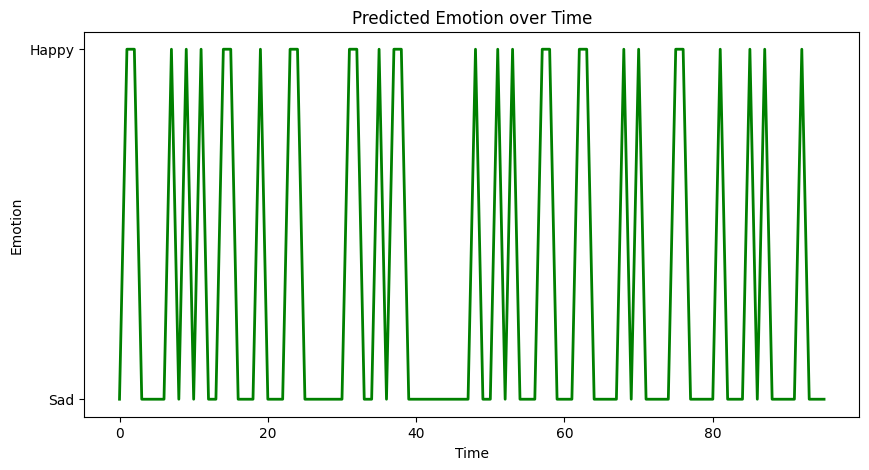

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample predicted emotions (replace this with your actual predicted emotions)
predicted_emotions = y_pred

# Assign numerical values to emotions ('happy' as 1, 'sad' as -1)
emotion_mapping = {'happy': 1, 'sad': -1}
emotion_values = [emotion_mapping[emotion] for emotion in predicted_emotions]

# Create a smooth line chart
plt.figure(figsize=(10, 5))
plt.plot(emotion_values, color='g', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Emotion')
plt.yticks([-1, 1], ['Sad', 'Happy'])
plt.title('Predicted Emotion over Time')
plt.show()


In [ ]:
# upload audio file
from google.colab import files
uploaded = files.upload()
path = next(iter(uploaded))

Saving batman.mp3 to batman.mp3


In [ ]:
num_speakers = 2 #@param {type:"integer"}

language = 'English' #@param ['any', 'English']

model_size = 'medium' #@param ['tiny', 'base', 'small', 'medium', 'large']


model_name = model_size
if language == 'English' and model_size != 'large':
  model_name += '.en'


In [ ]:
!pip install -q git+https://github.com/openai/whisper.git > /dev/null
!pip install -q git+https://github.com/pyannote/pyannote-audio > /dev/null

import whisper
import datetime

import subprocess

import torch
import pyannote.audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
embedding_model = PretrainedSpeakerEmbedding(
    "speechbrain/spkrec-ecapa-voxceleb",
    device=torch.device("cuda"))

from pyannote.audio import Audio
from pyannote.core import Segment

import wave
import contextlib

from sklearn.cluster import AgglomerativeClustering
import numpy as np

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


(…)a-voxceleb/resolve/main/hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

(…)eleb/resolve/main/mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

(…)-voxceleb/resolve/main/label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [ ]:
if path[-3:] != 'wav':
  subprocess.call(['ffmpeg', '-i', path, 'audio.wav', '-y'])
  path = 'audio.wav'

In [ ]:
model = whisper.load_model(model_size)

100%|█████████████████████████████████████| 1.42G/1.42G [00:24<00:00, 62.9MiB/s]


In [ ]:
result = model.transcribe(path)
segments = result["segments"]

In [ ]:
with contextlib.closing(wave.open(path,'r')) as f:
  frames = f.getnframes()
  rate = f.getframerate()
  duration = frames / float(rate)

In [ ]:
audio = Audio()

def segment_embedding(segment):
  start = segment["start"]
  # Whisper overshoots the end timestamp in the last segment
  end = min(duration, segment["end"])
  clip = Segment(start, end)
  waveform, sample_rate = audio.crop(path, clip)
  return embedding_model(waveform[None])

In [ ]:
embeddings = np.zeros(shape=(len(segments), 192))
for i, segment in enumerate(segments):
  embeddings[i] = segment_embedding(segment)

embeddings = np.nan_to_num(embeddings)

In [ ]:
clustering = AgglomerativeClustering(num_speakers).fit(embeddings)
labels = clustering.labels_
for i in range(len(segments)):
  segments[i]["speaker"] = 'SPEAKER ' + str(labels[i] + 1)

In [ ]:
def time(secs):
  return datetime.timedelta(seconds=round(secs))

f = open("transcript.txt", "w")

for (i, segment) in enumerate(segments):
  if i == 0 or segments[i - 1]["speaker"] != segment["speaker"]:
    f.write("\n" + segment["speaker"] + ' ' + str(time(segment["start"])) + '\n')
  f.write(segment["text"][1:] + ' ')
f.close()

In [ ]:
print(open('transcript.txt','r').read())


SPEAKER 2 0:00:00
So what are you proposing? 
SPEAKER 1 0:00:01
It's simple. Kill the Batman. 


In [ ]:
import pandas as pd

# Define the speaker dialogue
speaker_dialogue = [
    {"Speaker": "SPEAKER 2", "Time": "0:00:00", "Text": "So what are you proposing?"},
    {"Speaker": "SPEAKER 1", "Time": "0:00:01", "Text": "It's simple. Kill the Batman."}
]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(speaker_dialogue)

# Print the DataFrame
print(df)


     Speaker     Time                           Text
0  SPEAKER 2  0:00:00     So what are you proposing?
1  SPEAKER 1  0:00:01  It's simple. Kill the Batman.


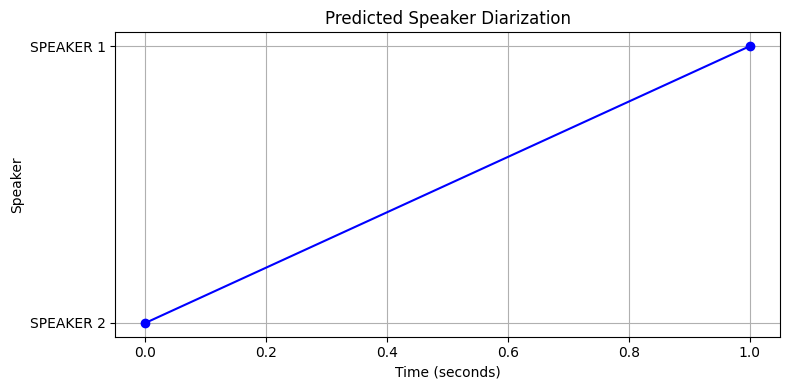

In [ ]:
import matplotlib.pyplot as plt

# Speaker dialogue data
speaker_dialogue = [
    {"Speaker": "SPEAKER 2", "Time": "0:00:00", "Text": "So what are you proposing?"},
    {"Speaker": "SPEAKER 1", "Time": "0:00:01", "Text": "It's simple. Kill the Batman."}
]

# Extract speaker labels and corresponding timestamps
speakers = [entry["Speaker"] for entry in speaker_dialogue]
timestamps = [entry["Time"] for entry in speaker_dialogue]

# Convert timestamps to seconds for smooth plotting
seconds = [int(time.split(":")[1])*60 + int(time.split(":")[2]) for time in timestamps]

# Plotting the smooth line chart
plt.figure(figsize=(8, 4))
plt.plot(seconds, range(len(speakers)), marker='o', linestyle='-', color='b')
plt.yticks(range(len(speakers)), speakers)
plt.xlabel('Time (seconds)')
plt.ylabel('Speaker')
plt.title('Predicted Speaker Diarization')
plt.grid(True)
plt.tight_layout()
plt.show()
